In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np

from collections import Counter

In [2]:
df = pd.read_csv('employee_retention_data.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
cntr = 0
errCnt = 0
for i in df.employee_id:
    if i-int(i):
        theID = i
        print cntr, ':',i
        errCnt = errCnt+1
    cntr = cntr+1

print 'Checked all', cntr, 'records'
print 'There were', errCnt, 'non-whole-number Employee_IDs'

Checked all 24702 records
There were 0 non-whole-number Employee_IDs


In [4]:
# make all Employee_IDs integers
df.employee_id = [int(i) for i in df.employee_id]

df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315,4,marketing,14,101000.0,2014-10-13,NaN
3,662910,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
currentEmp = df[df.quit_date != df.quit_date]

currentEmp.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
2,927315,4,marketing,14,101000.0,2014-10-13,NaN
6,88600,4,customer_service,21,107000.0,2013-10-21,NaN
7,716309,2,customer_service,4,30000.0,2014-03-05,NaN
9,504159,1,sales,7,104000.0,2012-06-12,NaN
11,904158,2,marketing,17,230000.0,2015-05-11,NaN


In [6]:
currentHeadcount = Counter(currentEmp.company_id)

print currentHeadcount
print
print currentHeadcount.values()

Counter({1: 3865, 2: 2016, 3: 1218, 4: 909, 5: 772, 6: 579, 7: 532, 8: 468, 9: 432, 10: 385, 12: 12, 11: 4})

[3865, 2016, 1218, 909, 772, 579, 532, 468, 432, 385, 4, 12]


In [7]:
overallHeadcount = Counter(df.company_id)

print overallHeadcount
print
print overallHeadcount.values()

Counter({1: 8486, 2: 4222, 3: 2749, 4: 2062, 5: 1755, 6: 1291, 7: 1224, 8: 1047, 9: 961, 10: 865, 12: 24, 11: 16})

[8486, 4222, 2749, 2062, 1755, 1291, 1224, 1047, 961, 865, 16, 24]


In [8]:
for i in range(len(currentHeadcount.values())):
    print 'Retention for Company', currentHeadcount.keys()[i], ':', 100.0*currentHeadcount.values()[i]/overallHeadcount.values()[i]

Retention for Company 1 : 45.5456045251
Retention for Company 2 : 47.7498815727
Retention for Company 3 : 44.3070207348
Retention for Company 4 : 44.083414161
Retention for Company 5 : 43.9886039886
Retention for Company 6 : 44.848954299
Retention for Company 7 : 43.4640522876
Retention for Company 8 : 44.6991404011
Retention for Company 9 : 44.9531737773
Retention for Company 10 : 44.5086705202
Retention for Company 11 : 25.0
Retention for Company 12 : 50.0


In [9]:
df_HeadCnt = pd.DataFrame({'Company _ID':currentHeadcount.keys(), 'Head Count':currentHeadcount.values()})
df_HeadCnt['As_Of_Date'] = '2015-12-13'
df_HeadCnt

,Company _ID,Head Count,As_Of_Date
0,1,3865,2015-12-13
1,2,2016,2015-12-13
2,3,1218,2015-12-13
3,4,909,2015-12-13
4,5,772,2015-12-13
5,6,579,2015-12-13
6,7,532,2015-12-13
7,8,468,2015-12-13
8,9,432,2015-12-13
9,10,385,2015-12-13


In [10]:
# from datetime import datetime
# theDate = df_HeadCnt.As_Of_Date[0]
# print 'That date is:', theDate

# datetime.strptime(theDate, '%Y-%m-%d').date()

<font size=5> 
<u>datetime</u> Behaviour
</font>
<br>
<font size=3.5>
https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior
</font>
<br>

In [11]:
## pandas can convert string to datetime

# aa = pd.to_datetime(df.join_date)
# type(aa[0])

In [12]:
from datetime import datetime, timedelta

# secondsInDay = 24*60*60.0

# dayStarted = '2011-01-23'
# dayQuit = '2015-12-17'


def string_2_Datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

# timeDiff = string_2_Datetime(dayQuit) - string_2_Datetime(dayStarted)

# print timeDiff.days
# print timeDiff.total_seconds()/secondsInDay

In [13]:
companyList = list(set(df.company_id))

day0 = string_2_Datetime('2011-01-23')
day_z = string_2_Datetime('2015-12-13')

# addDay = timedelta(days=1)

In [14]:
# for employees still around as at 2015-12-13, set thier quit_dates from NaN to '2015-12-13'
df.loc[df.quit_date != df.quit_date, 'quit_date'] = '2015-12-13'

# convert join_dates and quit_dates from strings to datetimes
df.join_date = [string_2_Datetime(i) for i in df.join_date]
df.quit_date = [string_2_Datetime(i) for i in df.quit_date]

In [15]:
def plotDailyHeadCount(thisDF):
    thisDay = day0
    daysElapsed = []
    employeeCount = []

    while thisDay <= day_z:
        alreadyJoined = thisDF[thisDF.join_date <= thisDay]
        notYetQuit = alreadyJoined[alreadyJoined.quit_date >= thisDay]
        employeeCount.append(notYetQuit.shape[0])
        daysElapsed.append((thisDay - day0).days)
        thisDay = thisDay + timedelta(days=1)

    plt.figure(figsize=[12,8])
    plt.plot(daysElapsed, employeeCount)
    plt.show()

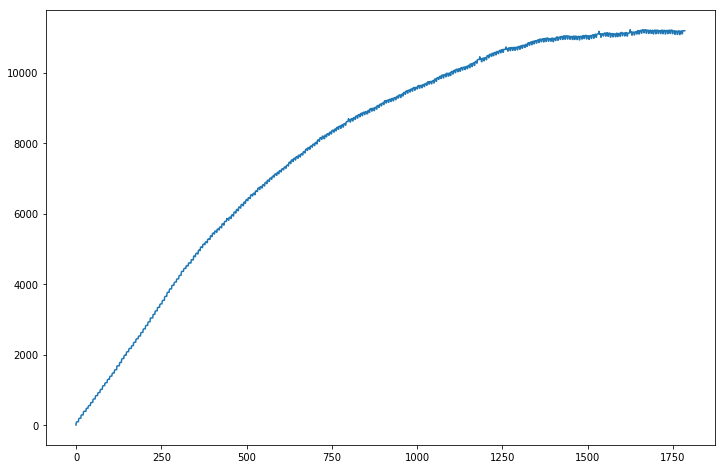

In [16]:
thisDF = df[df.company_id == 6] # select employee data for one of the companies
thisDF.reset_index(drop=True, inplace=True) # reset the indexes (row numbering)

plotDailyHeadCount(df) # plot daily headcount (for entire dataframe or by company_id)

/Users/ikennaivenso/anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


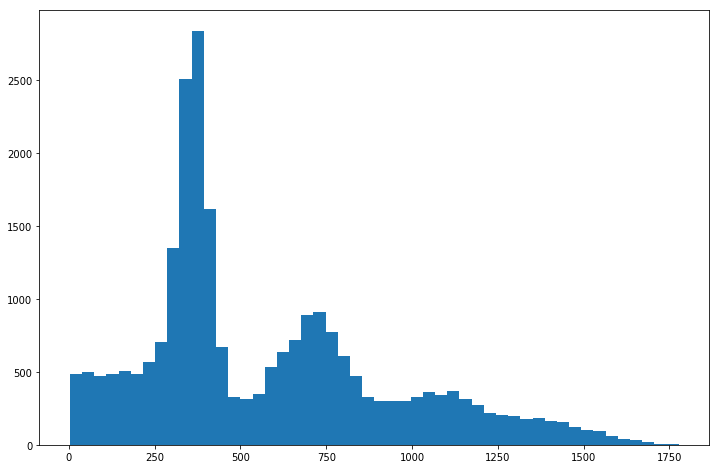

In [17]:
# get employment durations
empDuration = [i.days for i in (df.quit_date - df.join_date)]
plt.figure(figsize=[12,8])
plt.hist(empDuration, bins=50)
plt.show()

In [18]:
df.company_id = ['Company_'+str(i) for i in df.company_id]
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,Company_7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355,Company_7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315,Company_4,marketing,14,101000.0,2014-10-13,2015-12-13
3,662910,Company_7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971,Company_2,data_science,23,276000.0,2011-10-17,2014-08-22


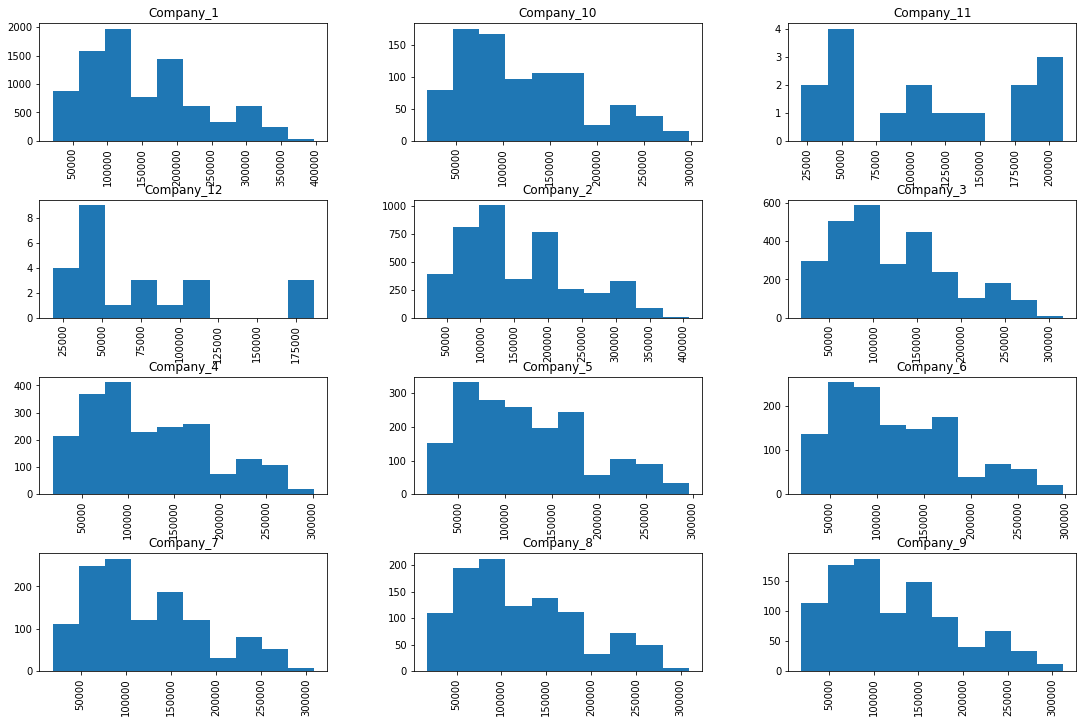

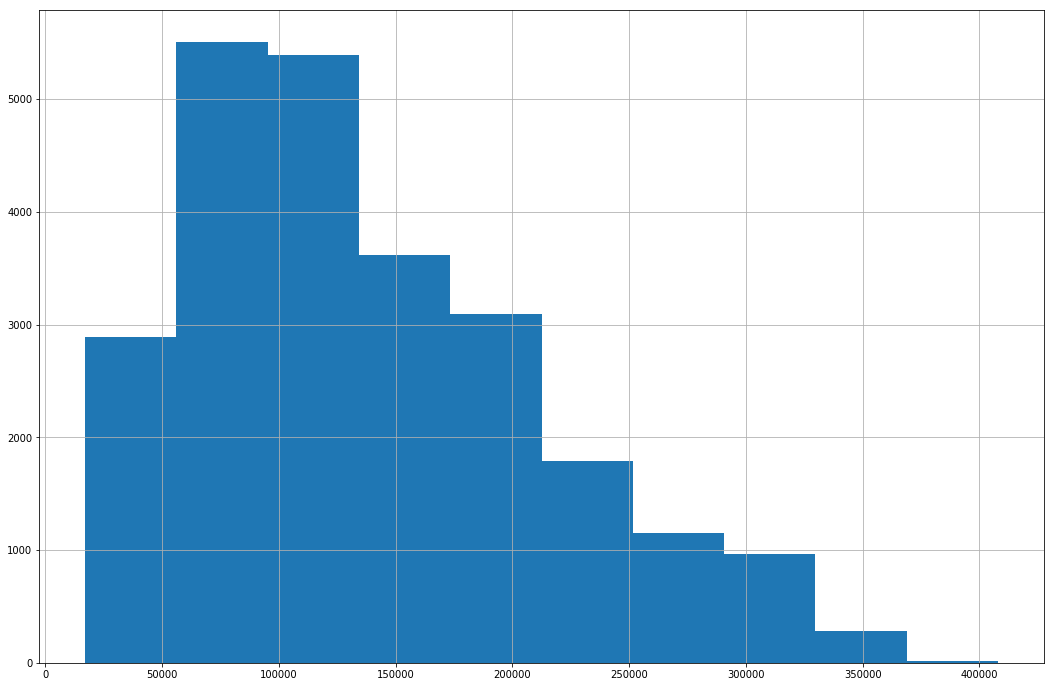

In [19]:
# salary distributions

# by company
df.salary.hist(by=df.company_id, figsize=[18,12])
plt.show()

# overall
df.salary.hist(figsize=[18,12])
plt.show()